<h1>Introduction</h1>
Zuber is a ride-sharing company that is starting business in Chicago. This data looks at competing taxi companies and their data regarding rides in Chicago in order to help Zuber make more informed decisions about their business model and practices going forward. Prior preprocessing was completed in SQL.

Importing necessary libraries

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial as ft 


Import files into dataframes

In [33]:

zuber_company_data = pd.read_csv('/datasets/project_sql_result_01.csv', encoding = "utf-8")
zuber_dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv', encoding = "utf-8")
zuber_rides_data = pd.read_csv('/datasets/project_sql_result_07.csv', encoding = "utf-8")


Display first dataframe and info

In [34]:
display(zuber_company_data.head())
zuber_company_data.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Display second dataframe and info

In [35]:
display(zuber_dropoff_data.head())
zuber_dropoff_data.info()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Display third dataframe and info

In [36]:
display(zuber_rides_data.head())
zuber_rides_data.info()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<h1>Data Pre-Processing</h1>

<h2>Taxi Company Data</h2>

This code checks for duplicate rows

In [37]:
print(zuber_company_data.duplicated().sum())

0


This code checks for other duplicates in the company names

In [38]:
print(zuber_company_data.duplicated(subset=['company_name', 'trips_amount']).sum())
#print(zuber_company_data['company_name'].value_counts())
#print(zuber_company_data['company_name'].unique())
zuber_company_data['company_name_lowercase'] = zuber_company_data['company_name'].str.lower()
#print(zuber_company_data['company_name'].duplicated().sum())
print(zuber_company_data['company_name_lowercase'].value_counts())
print(zuber_company_data['company_name_lowercase'].unique())
print(zuber_company_data.duplicated(subset=['company_name_lowercase', 'trips_amount']).sum())
zuber_company_data.drop(['company_name_lowercase'], axis=1, inplace=True)


0
flash cab                      1
taxi affiliation services      1
norshore cab                   1
6742 - 83735 tasha ride inc    1
3591 - 63480 chuks cab         1
                              ..
gold coast taxi                1
service taxi association       1
5 star taxi                    1
303 taxi                       1
3556 - 36214 rc andrews cab    1
Name: company_name_lowercase, Length: 64, dtype: int64
['flash cab' 'taxi affiliation services' 'medallion leasin' 'yellow cab'
 'taxi affiliation service yellow' 'chicago carriage cab corp'
 'city service' 'sun taxi' 'star north management llc'
 'blue ribbon taxi association inc.' 'choice taxi association'
 'globe taxi' 'dispatch taxi affiliation' 'nova taxi affiliation llc'
 'patriot taxi dba peace taxi associat' 'checker taxi affiliation'
 'blue diamond' 'chicago medallion management' '24 seven taxi'
 'chicago medallion leasing inc' 'checker taxi' 'american united'
 'chicago independents' 'koam taxi association' 'chicago tax

<h2>Dropoff Data</h2>

This code checks for duplicate rows

In [39]:
print(zuber_dropoff_data.duplicated().sum())

0


This code checks for other duplicates in the dropoff location names

In [40]:
print(zuber_dropoff_data.duplicated(subset=['dropoff_location_name', 'average_trips']).sum())
#print(zuber_dropoff_data['dropoff_location_name'].value_counts())
#print(zuber_dropoff_data['dropoff_location_name'].unique())
zuber_dropoff_data['location_name_lowercase'] = zuber_dropoff_data['dropoff_location_name'].str.lower()
#print(zuber_dropoff_data['dropoff_location_name'].duplicated().sum())
print(zuber_dropoff_data['location_name_lowercase'].value_counts())
print(zuber_dropoff_data['location_name_lowercase'].unique())
print(zuber_dropoff_data.duplicated(subset=['location_name_lowercase', 'average_trips']).sum())
zuber_dropoff_data.drop(['location_name_lowercase'], axis=1, inplace=True)



0
loop               1
chatham            1
clearing           1
auburn gresham     1
washington park    1
                  ..
albany park        1
wicker park        1
avondale           1
hyde park          1
riverdale          1
Name: location_name_lowercase, Length: 94, dtype: int64
['loop' 'river north' 'streeterville' 'west loop' "o'hare" 'lake view'
 'grant park' 'museum campus' 'gold coast' 'sheffield & depaul'
 'lincoln park' 'east village' 'little italy, uic' 'uptown'
 'near south side' 'garfield ridge' 'logan square' 'edgewater' 'west town'
 'old town' 'rush & division' 'north center' 'lincoln square'
 'rogers park' 'west ridge' 'irving park' 'hyde park' 'avondale'
 'wicker park' 'albany park' 'united center' 'lower west side' 'douglas'
 'portage park' 'humboldt park' 'norwood park' 'kenwood' 'bridgeport'
 'armour square' 'jefferson park' 'bucktown' 'north park' 'garfield park'
 'mckinley park' 'belmont cragin' 'boystown' 'chinatown' 'grand boulevard'
 'austin' 'sauganash,f

Average trips should be a whole number. This code rounds the average_trips column to a whole number, then converts the column to the int datatype.

In [41]:
zuber_dropoff_data['average_trips'] = round(zuber_dropoff_data['average_trips'], 0)

zuber_dropoff_data['average_trips'] = zuber_dropoff_data['average_trips'].astype('int')

<h2>Rides Data</h2>

This code checks for duplicate rows

In [42]:
print(zuber_rides_data.duplicated().sum())
print(zuber_rides_data.duplicated())

197
0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool


I am leaving these duplicates based on the way they were calculated in SQL. Because "Good" or "Bad" is a generic description, it could have had other descriptions in the previous weather description.

<h1>Data Analysis</h1>

This code identifies the top ten neighborhoods for dropoffs and creates a bar chart displaying them visually.

,dropoff_location_name,average_trips
50,Loop,10727
68,River North,9524
78,Streeterville,6665
87,West Loop,5164
63,O'Hare,2547
44,Lake View,2421
35,Grant Park,2069
56,Museum Campus,1510
32,Gold Coast,1364
74,Sheffield & DePaul,1260


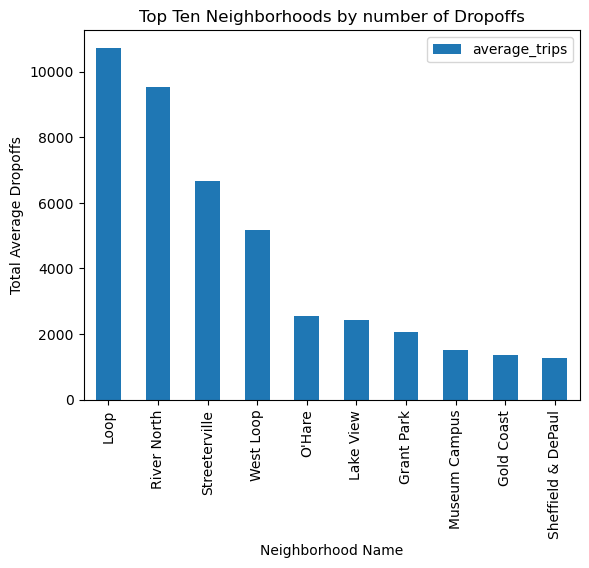

In [51]:
dropoff_trips = zuber_dropoff_data.groupby('dropoff_location_name')['average_trips'].sum()
dropoff_trips = dropoff_trips.reset_index().rename(columns={0: 'dropoff_location_name', 'average_trips': 'average_trips'})
dropoff_trips = dropoff_trips.sort_values(by='average_trips', ascending=False)
dropoff_trips = dropoff_trips.head(10)
dropoff_trips.plot(kind='bar',                  
                   x='dropoff_location_name',
                   y='average_trips',
                   title='Top Ten Neighborhoods by number of Dropoffs',
                   xlabel='Neighborhood Name',
                   ylabel='Total Average Dropoffs'

                 )
display(dropoff_trips)
plt.show()


There is a large difference between the number one neighborhood for average dropoffs and the number ten neighborhood for average dropoffs. My guess is that the numbers continue to drop off sharply.

Taxi companies and number of rides

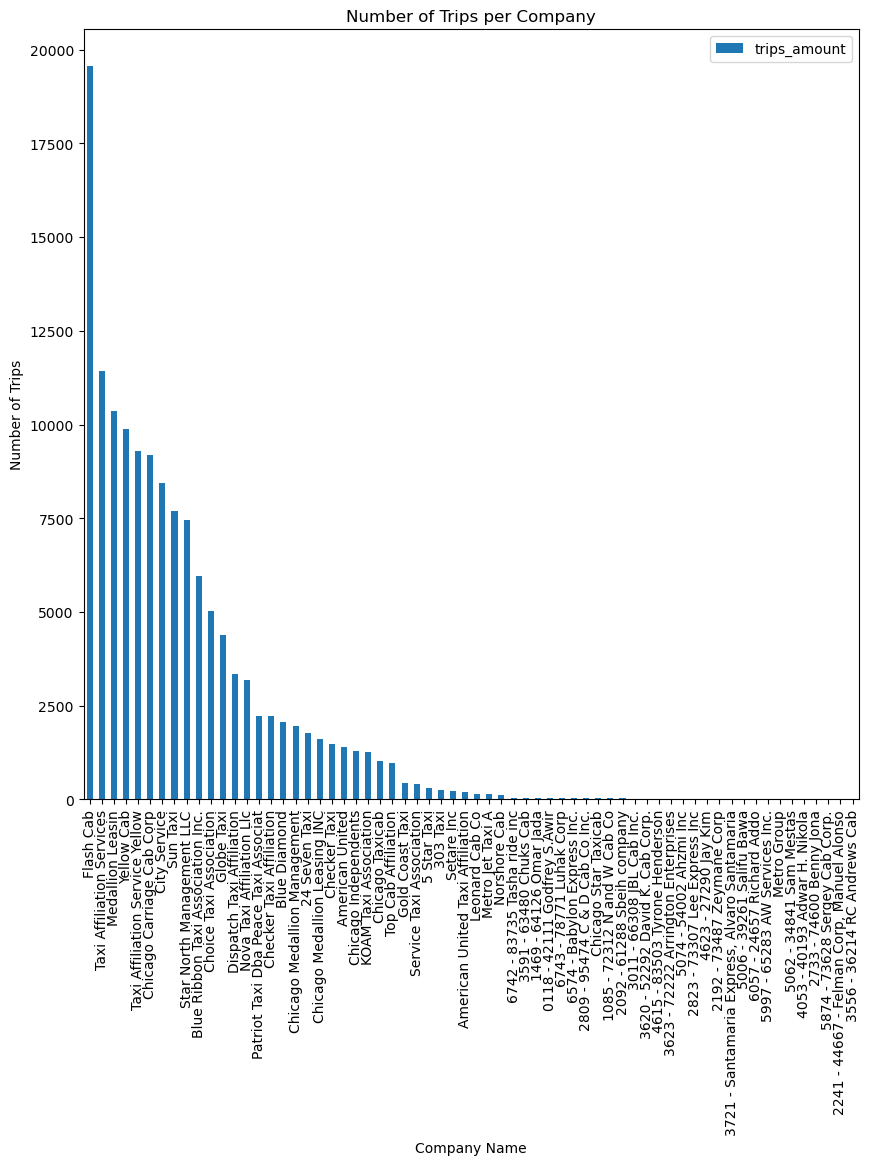

In [55]:
ride_data = zuber_company_data.groupby('company_name')['trips_amount'].sum()
ride_data = ride_data.reset_index().rename(columns={0: 'company_name', 'trips_amount': 'trips_amount'})
ride_data = ride_data.sort_values(by='trips_amount', ascending=False)
ride_data.plot(kind='bar',                  
                   x='company_name',
                   y='trips_amount',
                   title='Number of Trips per Company',
                   xlabel='Company Name',
                   ylabel='Number of Trips',
                   figsize=[10, 10]

              )

plt.show()




The number one company actually seems to be a strong outlier, and after the top 40 companies, the numbers seem to drop off entirely. This could be because of higher population numbers in the neighborhoods that use the top cab company, or that the the company is close to the airport. Without further investigation it is difficult to say for sure.

<h1>Testing Hypotheses</h1>

Null Hypothesis: The average duration of rides from the Loop to O'Hare International Airport is not significantly different on rainy Saturdays.

Alternative Hypothesis: The average duration of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays.

Alpha value: .01

In [58]:
alpha = .01

results = st.ttest_ind(zuber_rides_data[zuber_rides_data['weather_conditions'] == 'Bad']['duration_seconds'], zuber_rides_data[zuber_rides_data['weather_conditions'] == 'Good']['duration_seconds'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print(
        "We reject the null hypothesis: the average duration of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays."
    )
else:
    print(
        "We cannot reject the null hypothesis: average duration of rides from the Loop to O'Hare International Airport is not significantly different on rainy Saturdays."
    )

p-value: 6.738994326108734e-12
We reject the null hypothesis: the average duration of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays.


It seems that the duration of rides does have a difference in rainy weather. This could be because people use cabs more when the weather is bad. which has an impact on the averages.

<h1>Conclusions</h1>

Zuber's main competitor is going to be Flash Cab. It may be good to figure out how they price their services and make prices competitive. The main neighborhood that uses cab services is the Loop. Advertising is going to be key in that neighborhood, and perhaps at the airport. Since average duration of cab rides are impacted by weather, Zuber should figure out how to take advantage of this as well.